# **Experiment Notebook**



In [5]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [6]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [7]:
# <Student to fill this section>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

---
## A. Project Description


In [8]:
# <Student to fill this section>
student_name = "Afraz Ul Rupak"
student_id = "25627377"

In [9]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [10]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [11]:
# <Student to fill this section>
business_use_case_description = """
Explain clearly what is the goal of this project for the business.
"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [13]:
# <Student to fill this section>
business_objectives = """
What will be the impact of accurate or incorrect results?
"""

In [14]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [15]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
How will the results be used?
Who will be the users of your predictions? Who will be impacted by your predictions?
"""

In [16]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [20]:
# <Student to fill this section>
daily_df = pd.read_csv('~/weather_forecast/weather_forecast/data/raw/daily_with_targets.csv')
hourly_df = pd.read_csv('~/weather_forecast/weather_forecast/data/raw/hourly_with_targets.csv')

### C.2 Daily weath forecasting EDA 

In [21]:
# <Student to fill this section>
daily_df.head()

,date,temperature_2m_max,temperature_2m_min,temperature_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,pressure_msl_mean,wind_speed_10m_max,wind_speed_10m_mean,wind_direction_10m_dominant,precipitation_sum,rain_sum,shortwave_radiation_sum,daylight_duration,rain_in_7_days
0,2020-01-01,23.9,19.2,21.6,82,56,1014.3,19.6,16.3,168,0.0,0.0,28.18,51704.47,1
1,2020-01-02,25.2,20.2,22.1,86,55,1017.9,19.5,14.3,137,0.9,0.9,24.85,51671.07,1
2,2020-01-03,28.8,20.8,23.7,95,56,1014.4,26.3,14.4,67,1.7,1.7,26.92,51634.70,0
3,2020-01-04,41.8,19.9,29.4,97,18,1008.0,41.8,15.5,29,0.0,0.0,28.23,51595.43,1
4,2020-01-05,24.4,20.4,21.9,73,59,1017.9,34.6,24.8,169,0.2,0.2,22.91,51553.35,1


In [22]:
hourly_df.head()

,datetime,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,pressure_msl,cloud_cover,wind_speed_10m,wind_direction_10m,shortwave_radiation,surface_pressure,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation_next_72h
0,2020-01-01 00:00:00,19.7,78,15.8,0.0,0.0,1013.5,99,19.3,189,0.0,1007.5,63,97,18,2.6
1,2020-01-01 01:00:00,19.5,79,15.7,0.0,0.0,1012.8,100,19.6,193,0.0,1006.8,100,99,86,2.6
2,2020-01-01 02:00:00,19.5,78,15.5,0.0,0.0,1012.9,100,17.5,199,0.0,1006.9,100,77,70,2.6
3,2020-01-01 03:00:00,19.2,77,15.2,0.0,0.0,1012.5,100,17.7,197,0.0,1006.5,100,0,0,2.6
4,2020-01-01 04:00:00,19.6,74,14.8,0.0,0.0,1012.6,100,19.0,195,0.0,1006.6,100,0,0,2.6


## Daily Weather Datas EDA

In [23]:
print("Daily Dataframe Shape:", daily_df.shape)
print(daily_df.info())
print(daily_df.describe())

Daily Dataframe Shape: (2008, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         2008 non-null   object 
 1   temperature_2m_max           2008 non-null   float64
 2   temperature_2m_min           2008 non-null   float64
 3   temperature_2m_mean          2008 non-null   float64
 4   relative_humidity_2m_max     2008 non-null   int64  
 5   relative_humidity_2m_min     2008 non-null   int64  
 6   pressure_msl_mean            2008 non-null   float64
 7   wind_speed_10m_max           2008 non-null   float64
 8   wind_speed_10m_mean          2008 non-null   float64
 9   wind_direction_10m_dominant  2008 non-null   int64  
 10  precipitation_sum            2008 non-null   float64
 11  rain_sum                     2008 non-null   float64
 12  shortwave_radiation_sum      2008 non-null

In [24]:
daily_df.dtypes

date                            object
temperature_2m_max             float64
temperature_2m_min             float64
temperature_2m_mean            float64
relative_humidity_2m_max         int64
relative_humidity_2m_min         int64
pressure_msl_mean              float64
wind_speed_10m_max             float64
wind_speed_10m_mean            float64
wind_direction_10m_dominant      int64
precipitation_sum              float64
rain_sum                       float64
shortwave_radiation_sum        float64
daylight_duration              float64
rain_in_7_days                   int64
dtype: object

In [25]:
# Convert 'date' to pandas datetime and add separate day, month, year columns
daily_df['date'] = pd.to_datetime(daily_df['date'], format='%Y-%m-%d', errors='coerce')
daily_df['day'] = daily_df['date'].dt.day
daily_df['month'] = daily_df['date'].dt.month
daily_df['year'] = daily_df['date'].dt.year

In [26]:
daily_df

,date,temperature_2m_max,temperature_2m_min,temperature_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,pressure_msl_mean,wind_speed_10m_max,wind_speed_10m_mean,wind_direction_10m_dominant,precipitation_sum,rain_sum,shortwave_radiation_sum,daylight_duration,rain_in_7_days,day,month,year
0,2020-01-01,23.9,19.2,21.6,82,56,1014.3,19.6,16.3,168,0.0,0.0,28.18,51704.47,1,1,1,2020
1,2020-01-02,25.2,20.2,22.1,86,55,1017.9,19.5,14.3,137,0.9,0.9,24.85,51671.07,1,2,1,2020
2,2020-01-03,28.8,20.8,23.7,95,56,1014.4,26.3,14.4,67,1.7,1.7,26.92,51634.70,0,3,1,2020
3,2020-01-04,41.8,19.9,29.4,97,18,1008.0,41.8,15.5,29,0.0,0.0,28.23,51595.43,1,4,1,2020
4,2020-01-05,24.4,20.4,21.9,73,59,1017.9,34.6,24.8,169,0.2,0.2,22.91,51553.35,1,5,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2025-06-26,14.1,6.7,10.5,66,41,1024.0,25.0,16.6,238,0.0,0.0,11.13,35670.66,0,26,6,2025
2004,2025-06-27,14.4,7.2,10.9,78,59,1030.0,16.4,11.9,230,0.0,0.0,6.27,35685.55,0,27,6,2025
2005,2025-06-28,16.3,7.9,12.0,89,63,1027.8,10.9,6.7,267,0.0,0.0,9.40,35703.02,0,28,6,2025
2006,2025-06-29,17.2,6.1,11.7,94,48,1024.9,10.7,5.3,269,0.0,0.0,10.95,35723.03,0,29,6,2025


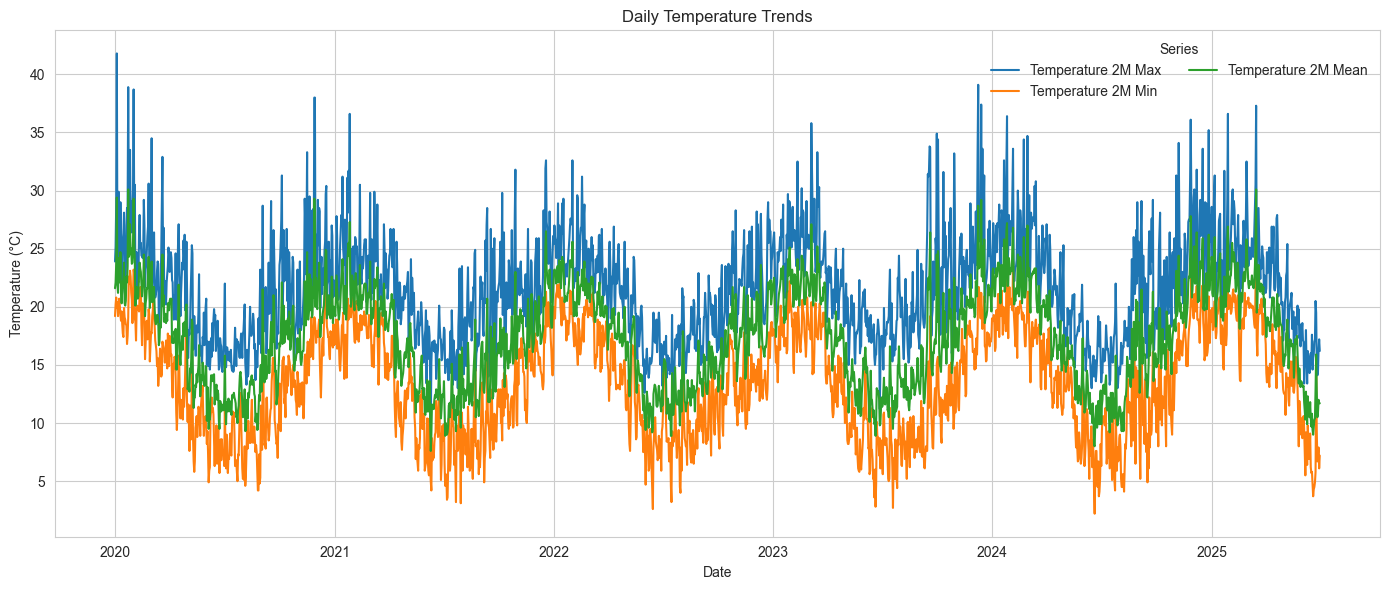

In [27]:
# Plot date vs all temperature-related columns in one chart with different colors
sns.set_style("whitegrid")

# Select temperature columns dynamically
temp_cols = [c for c in daily_df.columns if "temperature" in c.lower()]
if not temp_cols:
    print("No temperature-related columns found in daily_df.")
else:
    d = daily_df.sort_values("date")
    colors = sns.color_palette("tab10", n_colors=len(temp_cols))

    plt.figure(figsize=(14, 6))
    for col, color in zip(temp_cols, colors):
        plt.plot(d["date"], d[col], label=col.replace("_", " ").title(), color=color, linewidth=1.5)

    plt.title("Daily Temperature Trends")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend(title="Series", ncol=2, frameon=False)
    plt.tight_layout()
    plt.show()

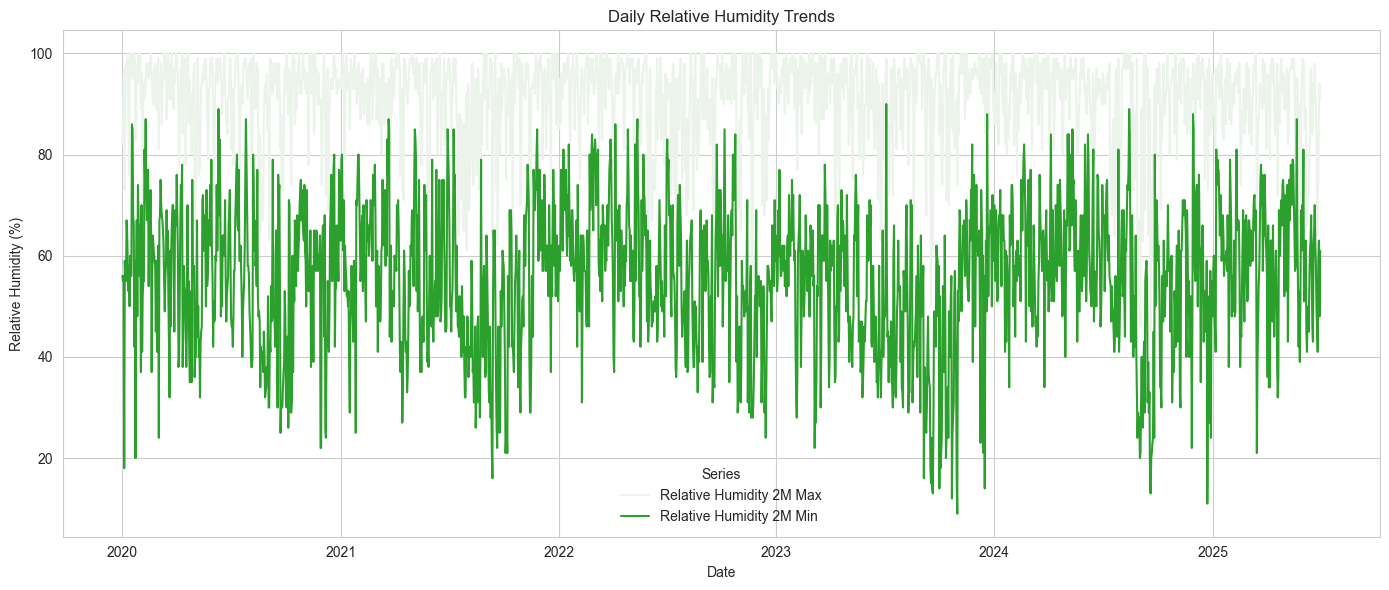

In [28]:
# Plot date vs all humidity-related columns with one color in different shades
hum_cols = [c for c in daily_df.columns if "humidity" in c.lower()]
if not hum_cols:
    print("No humidity-related columns found in daily_df.")
else:
    df_plot = d if 'd' in globals() else daily_df.sort_values("date")
    base_color = color if 'color' in globals() else "#1f77b4"
    shades = sns.light_palette(base_color, n_colors=len(hum_cols))

    plt.figure(figsize=(14, 6))
    for c, shade in zip(hum_cols, shades):
        plt.plot(df_plot["date"], df_plot[c], label=c.replace("_", " ").title(), color=shade, linewidth=1.5)

    plt.title("Daily Relative Humidity Trends")
    plt.xlabel("Date")
    plt.ylabel("Relative Humidity (%)")
    plt.legend(title="Series", frameon=False)
    plt.tight_layout()
    plt.show()

### C.3 Rain Prediction Analysis

Let's analyze the data specifically for predicting day-wise rain occurrence.

In [29]:
# Check missing values in daily_df
print("Missing values in daily_df:")
print(daily_df.isnull().sum())
print("\nPercentage of missing values:")
print((daily_df.isnull().sum() / len(daily_df)) * 100)

Missing values in daily_df:
date                           0
temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            0
relative_humidity_2m_max       0
relative_humidity_2m_min       0
pressure_msl_mean              0
wind_speed_10m_max             0
wind_speed_10m_mean            0
wind_direction_10m_dominant    0
precipitation_sum              0
rain_sum                       0
shortwave_radiation_sum        0
daylight_duration              0
rain_in_7_days                 0
day                            0
month                          0
year                           0
dtype: int64

Percentage of missing values:
date                           0.0
temperature_2m_max             0.0
temperature_2m_min             0.0
temperature_2m_mean            0.0
relative_humidity_2m_max       0.0
relative_humidity_2m_min       0.0
pressure_msl_mean              0.0
wind_speed_10m_max             0.0
wind_speed_10m_mean            0.0
wind_direction_10m_

In [30]:
# Create target variable for rain prediction
# If rain_sum > 0, then it's a rainy day (1), otherwise no rain (0)
daily_df['rain_binary'] = (daily_df['rain_sum'] > 0).astype(int)

print("Rain occurrence distribution:")
print(daily_df['rain_binary'].value_counts())
print("\nPercentage distribution:")
print(daily_df['rain_binary'].value_counts(normalize=True) * 100)

Rain occurrence distribution:
rain_binary
1    1245
0     763
Name: count, dtype: int64

Percentage distribution:
rain_binary
1    62.001992
0    37.998008
Name: proportion, dtype: float64


In [31]:
# Analyze rain patterns by month and season
monthly_rain = daily_df.groupby('month').agg({
    'rain_sum': ['mean', 'sum', 'count'],
    'rain_binary': 'mean'
}).round(2)

monthly_rain.columns = ['avg_rain_mm', 'total_rain_mm', 'days_count', 'rain_probability']
print("Monthly Rain Analysis:")
print(monthly_rain)

Monthly Rain Analysis:
       avg_rain_mm  total_rain_mm  days_count  rain_probability
month                                                          
1             4.10          762.7         186              0.74
2             4.82          819.1         170              0.81
3             5.60         1041.2         186              0.76
4             3.44          619.0         180              0.63
5             3.71          690.7         186              0.53
6             1.74          313.8         180              0.41
7             3.31          512.8         155              0.48
8             1.87          289.2         155              0.50
9             1.70          254.3         150              0.49
10            3.04          471.5         155              0.63
11            3.36          503.5         150              0.71
12            2.68          415.3         155              0.73


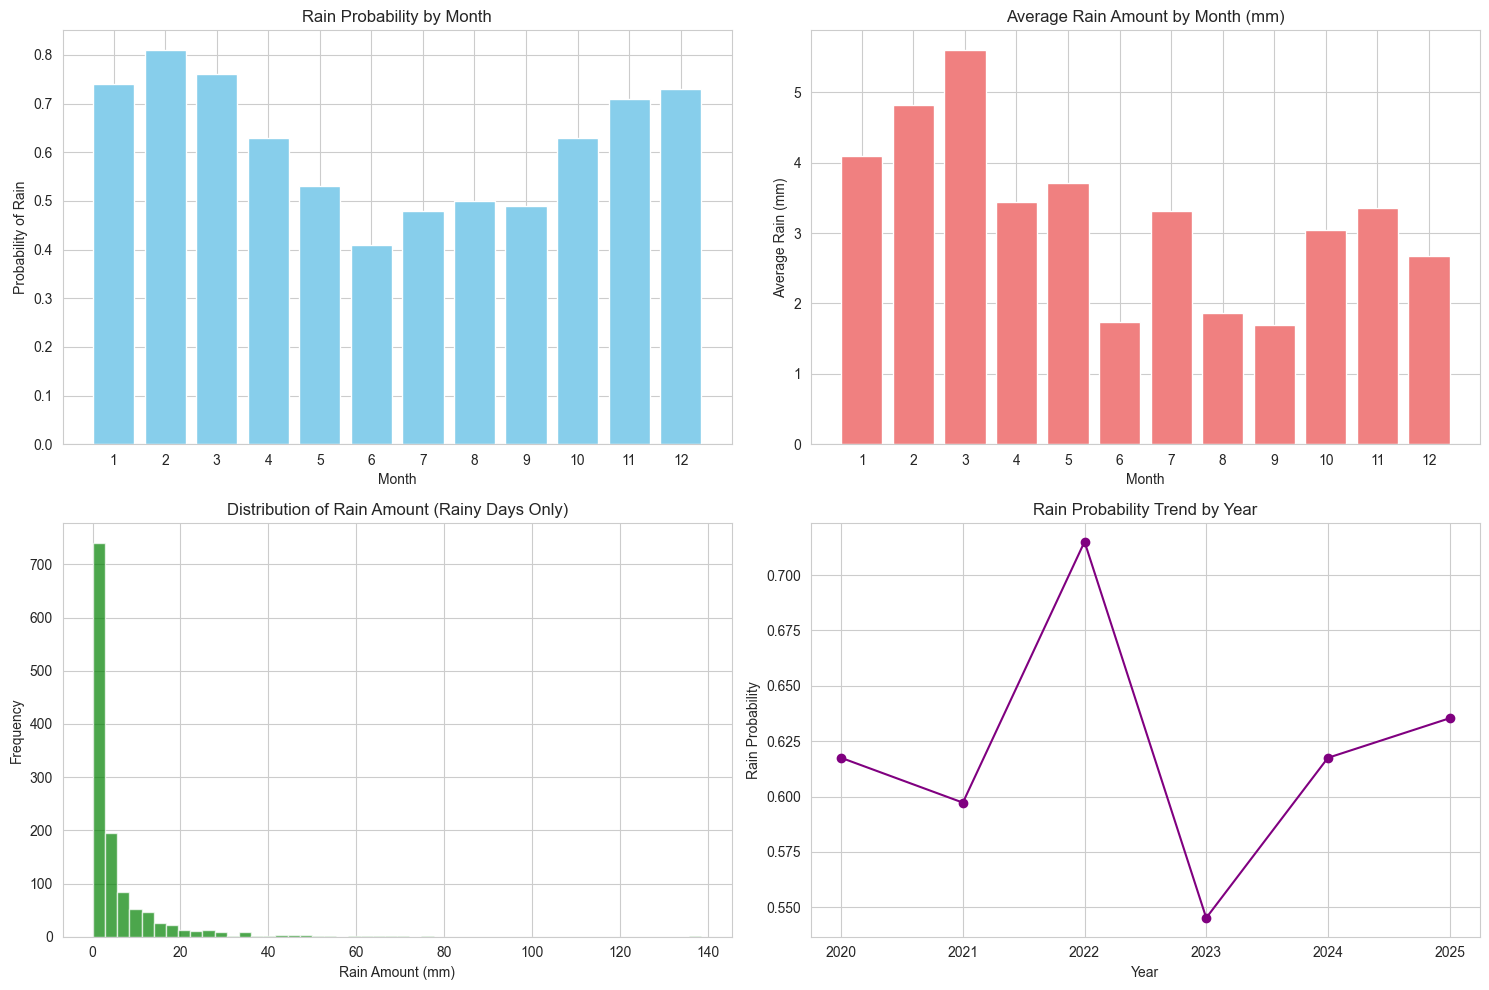

In [32]:
# Visualize rain distribution by month
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Monthly rain probability
axes[0,0].bar(monthly_rain.index, monthly_rain['rain_probability'], color='skyblue')
axes[0,0].set_title('Rain Probability by Month')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Probability of Rain')
axes[0,0].set_xticks(range(1, 13))

# Monthly average rain amount
axes[0,1].bar(monthly_rain.index, monthly_rain['avg_rain_mm'], color='lightcoral')
axes[0,1].set_title('Average Rain Amount by Month (mm)')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Average Rain (mm)')
axes[0,1].set_xticks(range(1, 13))

# Rain distribution histogram
axes[1,0].hist(daily_df[daily_df['rain_sum'] > 0]['rain_sum'], bins=50, alpha=0.7, color='green')
axes[1,0].set_title('Distribution of Rain Amount (Rainy Days Only)')
axes[1,0].set_xlabel('Rain Amount (mm)')
axes[1,0].set_ylabel('Frequency')

# Yearly rain trends
yearly_rain = daily_df.groupby('year')['rain_binary'].mean()
axes[1,1].plot(yearly_rain.index, yearly_rain.values, marker='o', color='purple')
axes[1,1].set_title('Rain Probability Trend by Year')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Rain Probability')

plt.tight_layout()
plt.show()

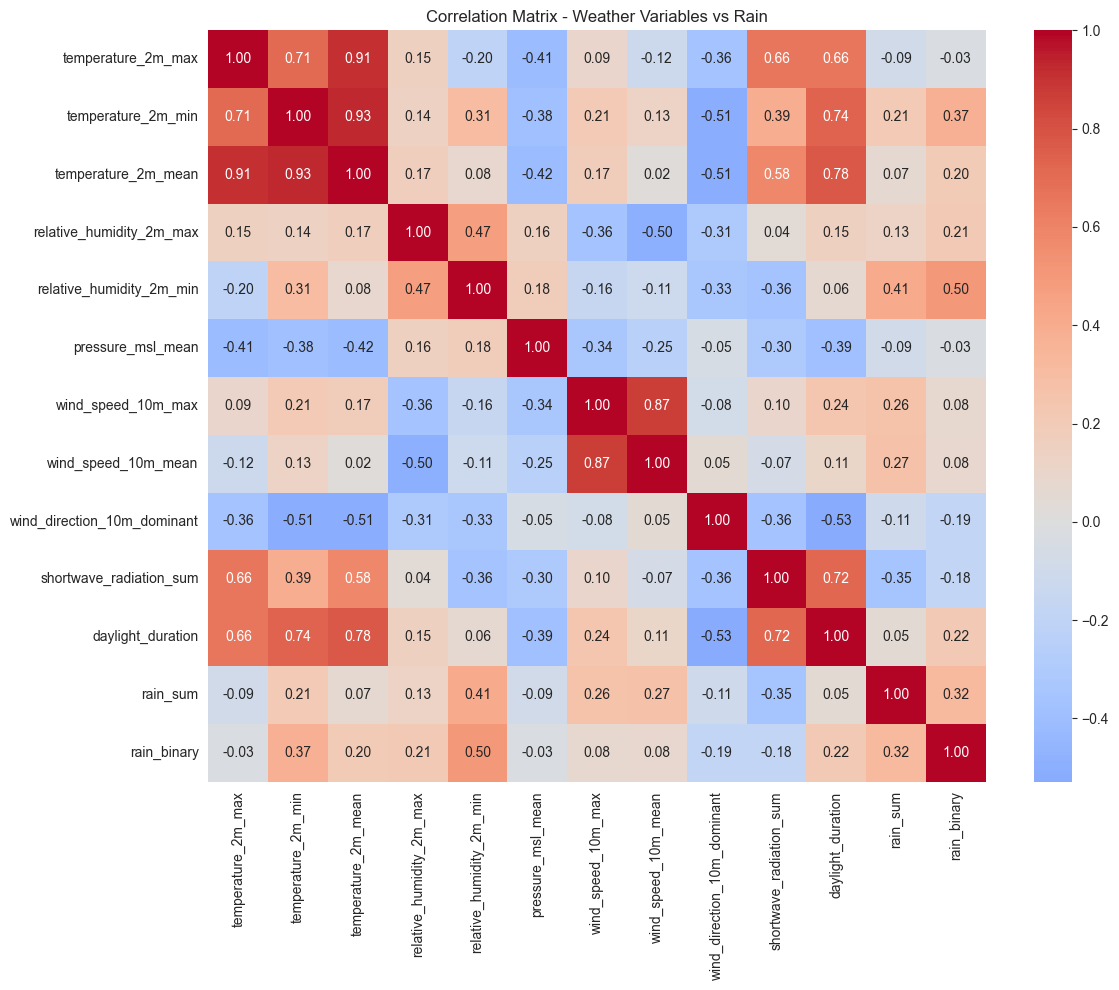


Correlation with Rain Occurrence (rain_binary):
rain_binary                    1.000000
relative_humidity_2m_min       0.503301
temperature_2m_min             0.373743
rain_sum                       0.318668
daylight_duration              0.215866
relative_humidity_2m_max       0.214430
temperature_2m_mean            0.200519
wind_direction_10m_dominant   -0.187597
shortwave_radiation_sum       -0.184704
wind_speed_10m_mean            0.084119
wind_speed_10m_max             0.077610
pressure_msl_mean             -0.025689
temperature_2m_max            -0.025283
Name: rain_binary, dtype: float64


In [33]:
# Correlation analysis for rain prediction
# Select numerical features for correlation analysis
numerical_features = ['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
                     'relative_humidity_2m_max', 'relative_humidity_2m_min', 'pressure_msl_mean',
                     'wind_speed_10m_max', 'wind_speed_10m_mean', 'wind_direction_10m_dominant',
                     'shortwave_radiation_sum', 'daylight_duration', 'rain_sum', 'rain_binary']

correlation_matrix = daily_df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - Weather Variables vs Rain')
plt.tight_layout()
plt.show()

# Show correlations with rain_binary specifically
print("\nCorrelation with Rain Occurrence (rain_binary):")
rain_correlations = correlation_matrix['rain_binary'].sort_values(key=abs, ascending=False)
print(rain_correlations)

In [34]:
# Analyze weather patterns on rainy vs non-rainy days
rainy_days = daily_df[daily_df['rain_binary'] == 1]
non_rainy_days = daily_df[daily_df['rain_binary'] == 0]

comparison_features = ['temperature_2m_mean', 'relative_humidity_2m_max', 'relative_humidity_2m_min', 
                      'pressure_msl_mean', 'wind_speed_10m_mean', 'shortwave_radiation_sum']

comparison_stats = pd.DataFrame({
    'Rainy_Days_Mean': rainy_days[comparison_features].mean(),
    'Non_Rainy_Days_Mean': non_rainy_days[comparison_features].mean(),
    'Difference': rainy_days[comparison_features].mean() - non_rainy_days[comparison_features].mean()
})

print("Weather Characteristics Comparison:")
print(comparison_stats.round(2))

Weather Characteristics Comparison:
                          Rainy_Days_Mean  Non_Rainy_Days_Mean  Difference
temperature_2m_mean                 17.97                16.21        1.76
relative_humidity_2m_max            92.78                89.07        3.71
relative_humidity_2m_min            61.19                46.60       14.59
pressure_msl_mean                 1017.01              1017.38       -0.36
wind_speed_10m_mean                 13.40                12.57        0.83
shortwave_radiation_sum             15.60                18.30       -2.70


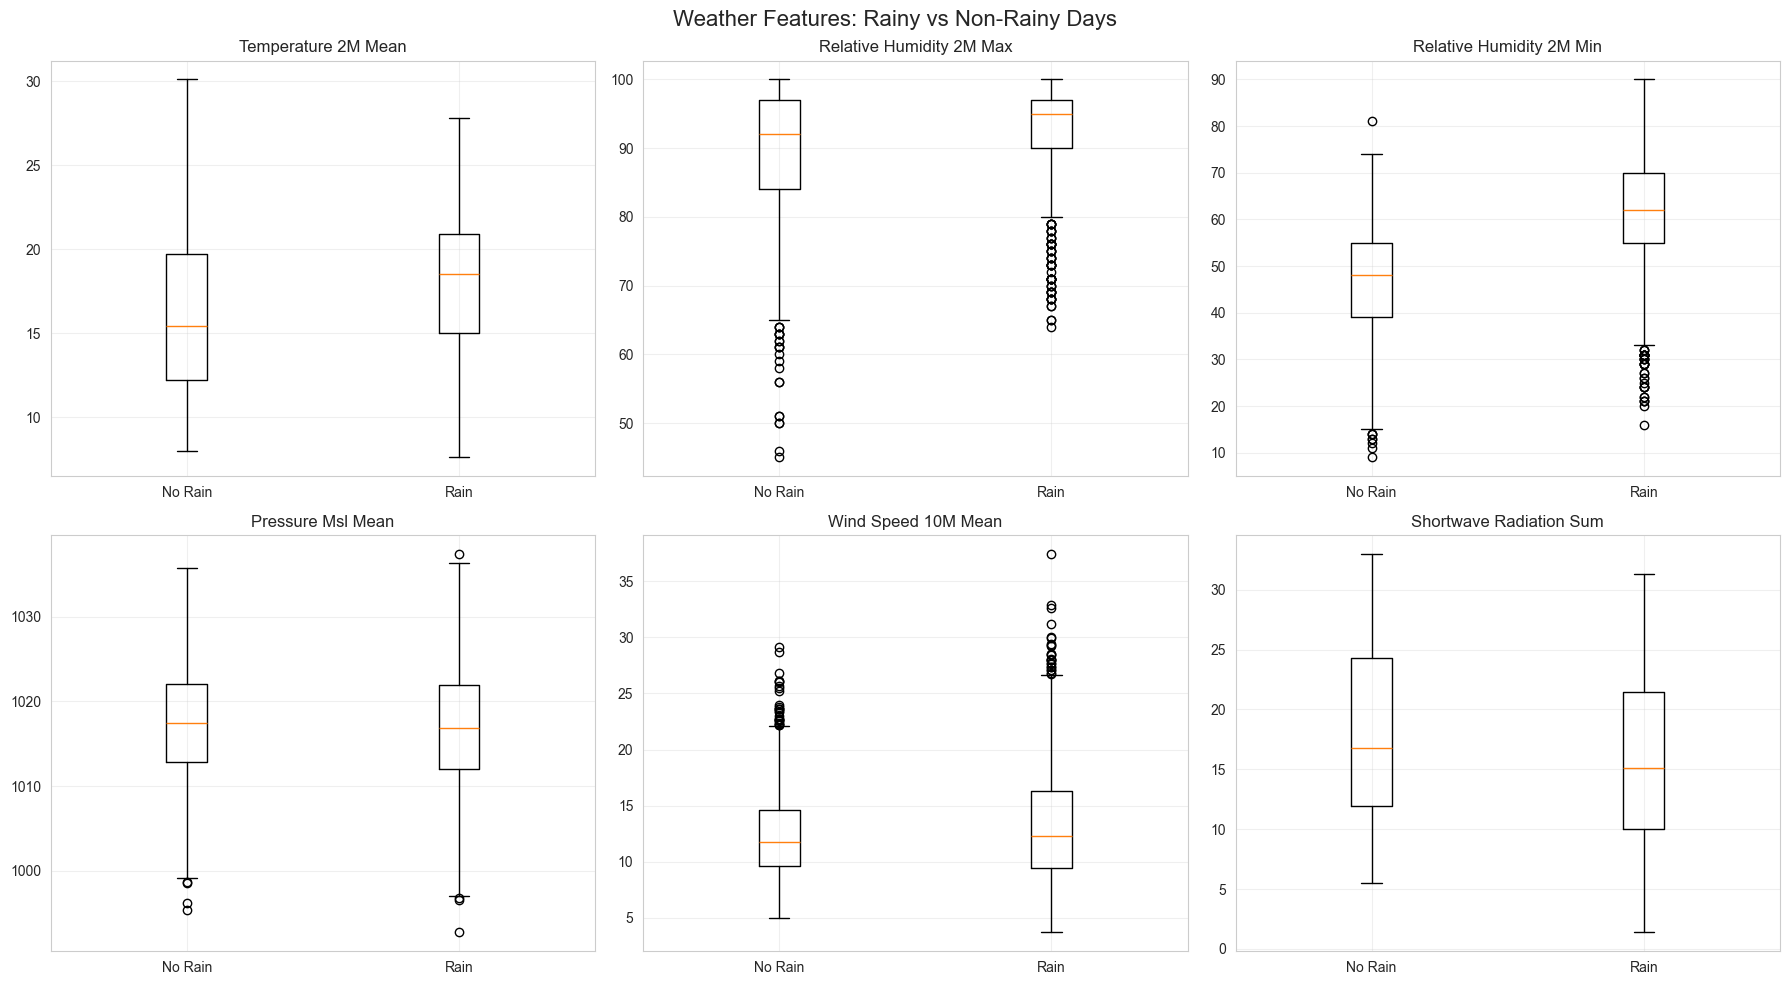

In [35]:
# Box plots comparing key features between rainy and non-rainy days
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(comparison_features):
    data = [non_rainy_days[feature], rainy_days[feature]]
    axes[i].boxplot(data, labels=['No Rain', 'Rain'])
    axes[i].set_title(f'{feature.replace("_", " ").title()}')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Weather Features: Rainy vs Non-Rainy Days', fontsize=16)
plt.tight_layout()
plt.show()

In [36]:
# Analyze consecutive rain patterns
daily_df_sorted = daily_df.sort_values('date').reset_index(drop=True)
daily_df_sorted['rain_streak'] = (daily_df_sorted['rain_binary'] * 
                                 (daily_df_sorted['rain_binary'].groupby((daily_df_sorted['rain_binary'] != daily_df_sorted['rain_binary'].shift()).cumsum()).cumcount() + 1))

# Find longest rain streaks
max_rain_streak = daily_df_sorted['rain_streak'].max()
print(f"Longest consecutive rainy days: {max_rain_streak}")

# Rain streak distribution
rain_streaks = daily_df_sorted[daily_df_sorted['rain_streak'] > 0]['rain_streak']
print("\nRain streak distribution:")
print(rain_streaks.value_counts().sort_index())

Longest consecutive rainy days: 28

Rain streak distribution:
rain_streak
1     298
2     216
3     155
4     120
5      96
6      73
7      57
8      46
9      39
10     32
11     26
12     21
13     14
14     12
15     10
16      7
17      5
18      3
19      3
20      2
21      2
22      2
23      1
24      1
25      1
26      1
27      1
28      1
Name: count, dtype: int64


In [37]:
# Feature engineering for rain prediction
daily_df_sorted['temp_range'] = daily_df_sorted['temperature_2m_max'] - daily_df_sorted['temperature_2m_min']
daily_df_sorted['humidity_range'] = daily_df_sorted['relative_humidity_2m_max'] - daily_df_sorted['relative_humidity_2m_min']
daily_df_sorted['wind_ratio'] = daily_df_sorted['wind_speed_10m_max'] / (daily_df_sorted['wind_speed_10m_mean'] + 0.1)

# Rolling averages (3-day and 7-day)
daily_df_sorted['temp_mean_3d'] = daily_df_sorted['temperature_2m_mean'].rolling(window=3, min_periods=1).mean()
daily_df_sorted['humidity_max_3d'] = daily_df_sorted['relative_humidity_2m_max'].rolling(window=3, min_periods=1).mean()
daily_df_sorted['pressure_7d'] = daily_df_sorted['pressure_msl_mean'].rolling(window=7, min_periods=1).mean()

print("New engineered features:")
print("- Temperature range (max - min)")
print("- Humidity range (max - min)")
print("- Wind ratio (max / mean)")
print("- 3-day rolling averages for temperature and humidity")
print("- 7-day rolling average for pressure")

# Show correlation of new features with rain
new_features = ['temp_range', 'humidity_range', 'wind_ratio', 'temp_mean_3d', 'humidity_max_3d', 'pressure_7d']
new_correlations = daily_df_sorted[new_features + ['rain_binary']].corr()['rain_binary'].sort_values(key=abs, ascending=False)
print("\nCorrelation of new features with rain:")
print(new_correlations[:-1])  # Exclude rain_binary itself

New engineered features:
- Temperature range (max - min)
- Humidity range (max - min)
- Wind ratio (max / mean)
- 3-day rolling averages for temperature and humidity
- 7-day rolling average for pressure

Correlation of new features with rain:
rain_binary        1.000000
temp_range        -0.534538
humidity_range    -0.420574
temp_mean_3d       0.238269
humidity_max_3d    0.229157
pressure_7d       -0.060618
Name: rain_binary, dtype: float64


In [38]:
# Summary statistics for model input features
model_features = ['temperature_2m_mean', 'relative_humidity_2m_max', 'relative_humidity_2m_min',
                 'pressure_msl_mean', 'wind_speed_10m_mean', 'wind_direction_10m_dominant',
                 'shortwave_radiation_sum', 'temp_range', 'humidity_range', 'month']

print("Summary statistics for potential model features:")
print(daily_df_sorted[model_features].describe().round(2))

# Check for any extreme outliers
print("\nChecking for extreme outliers (values beyond 3 standard deviations):")
for feature in model_features[:-1]:  # Exclude 'month'
    mean_val = daily_df_sorted[feature].mean()
    std_val = daily_df_sorted[feature].std()
    outliers = daily_df_sorted[(daily_df_sorted[feature] < mean_val - 3*std_val) | 
                              (daily_df_sorted[feature] > mean_val + 3*std_val)]
    if len(outliers) > 0:
        print(f"{feature}: {len(outliers)} extreme outliers found")

Summary statistics for potential model features:
       temperature_2m_mean  relative_humidity_2m_max  \
count              2008.00                   2008.00   
mean                 17.30                     91.37   
std                   4.26                      8.41   
min                   7.60                     45.00   
25%                  13.60                     89.00   
50%                  17.50                     94.00   
75%                  20.70                     97.00   
max                  30.10                    100.00   

       relative_humidity_2m_min  pressure_msl_mean  wind_speed_10m_mean  \
count                   2008.00            2008.00              2008.00   
mean                      55.65            1017.15                13.08   
std                       14.07               6.89                 4.79   
min                        9.00             992.70                 3.70   
25%                       47.00            1012.30                 9.50

### C.4 Combinational Analysis: Temperature, Humidity, and Wind Speed

Let's analyze how temperature, humidity, and wind speed interact with each other and their combined effect on rain prediction.

In [39]:
# Define key variables for combinational analysis
temp_col = 'temperature_2m_mean'
humidity_col = 'relative_humidity_2m_max'
wind_col = 'wind_speed_10m_mean'

print(f"Analyzing combinations of:")
print(f"- Temperature: {temp_col}")
print(f"- Humidity: {humidity_col}")
print(f"- Wind Speed: {wind_col}")
print(f"- Target: rain_binary")

Analyzing combinations of:
- Temperature: temperature_2m_mean
- Humidity: relative_humidity_2m_max
- Wind Speed: wind_speed_10m_mean
- Target: rain_binary


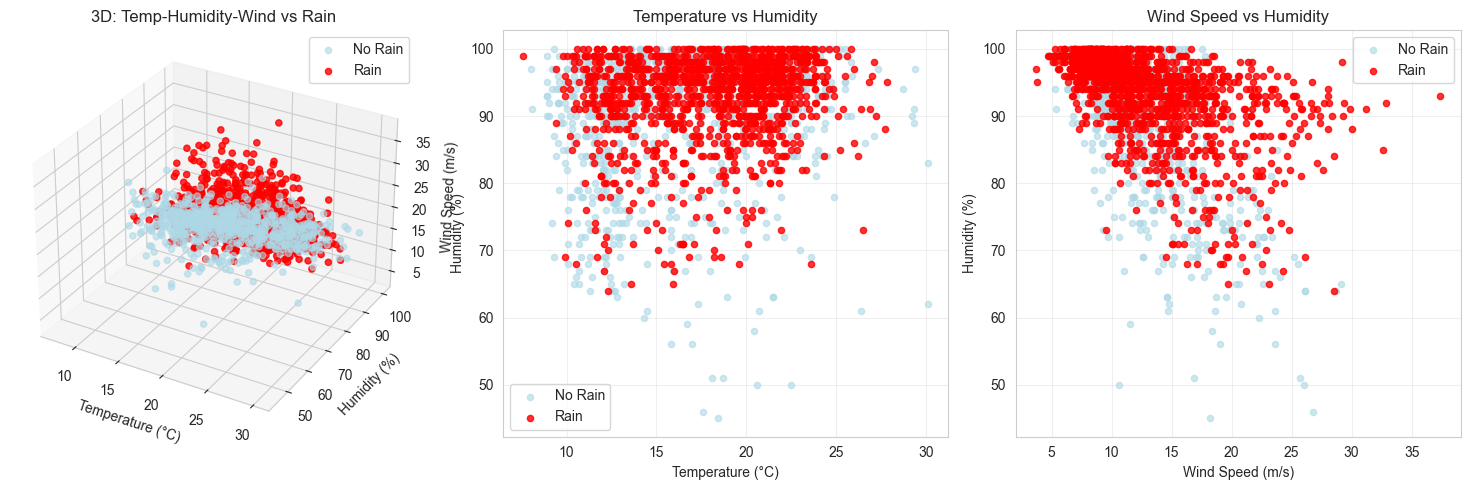

In [40]:
# 3D Scatter plot showing relationship between temperature, humidity, wind speed and rain
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 5))

# 3D scatter plot
ax1 = fig.add_subplot(131, projection='3d')

# Separate rainy and non-rainy days
rainy = daily_df_sorted[daily_df_sorted['rain_binary'] == 1]
non_rainy = daily_df_sorted[daily_df_sorted['rain_binary'] == 0]

# Plot non-rainy days
ax1.scatter(non_rainy[temp_col], non_rainy[humidity_col], non_rainy[wind_col], 
           c='lightblue', alpha=0.6, s=20, label='No Rain')

# Plot rainy days
ax1.scatter(rainy[temp_col], rainy[humidity_col], rainy[wind_col], 
           c='red', alpha=0.8, s=20, label='Rain')

ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Humidity (%)')
ax1.set_zlabel('Wind Speed (m/s)')
ax1.set_title('3D: Temp-Humidity-Wind vs Rain')
ax1.legend()

# 2D projections
ax2 = fig.add_subplot(132)
ax2.scatter(non_rainy[temp_col], non_rainy[humidity_col], c='lightblue', alpha=0.6, s=20, label='No Rain')
ax2.scatter(rainy[temp_col], rainy[humidity_col], c='red', alpha=0.8, s=20, label='Rain')
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Humidity (%)')
ax2.set_title('Temperature vs Humidity')
ax2.legend()
ax2.grid(True, alpha=0.3)

ax3 = fig.add_subplot(133)
ax3.scatter(non_rainy[wind_col], non_rainy[humidity_col], c='lightblue', alpha=0.6, s=20, label='No Rain')
ax3.scatter(rainy[wind_col], rainy[humidity_col], c='red', alpha=0.8, s=20, label='Rain')
ax3.set_xlabel('Wind Speed (m/s)')
ax3.set_ylabel('Humidity (%)')
ax3.set_title('Wind Speed vs Humidity')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [41]:
# Create bins for categorical analysis
# Temperature bins
daily_df_sorted['temp_category'] = pd.cut(daily_df_sorted[temp_col], 
                                         bins=3, labels=['Cool', 'Moderate', 'Warm'])

# Humidity bins
daily_df_sorted['humidity_category'] = pd.cut(daily_df_sorted[humidity_col], 
                                             bins=3, labels=['Low', 'Medium', 'High'])

# Wind speed bins
daily_df_sorted['wind_category'] = pd.cut(daily_df_sorted[wind_col], 
                                         bins=3, labels=['Light', 'Moderate', 'Strong'])

print("Category distributions:")
print("\nTemperature categories:")
print(daily_df_sorted['temp_category'].value_counts())
print("\nHumidity categories:")
print(daily_df_sorted['humidity_category'].value_counts())
print("\nWind categories:")
print(daily_df_sorted['wind_category'].value_counts())

Category distributions:

Temperature categories:
temp_category
Moderate    1111
Cool         689
Warm         208
Name: count, dtype: int64

Humidity categories:
humidity_category
High      1765
Medium     223
Low         20
Name: count, dtype: int64

Wind categories:
wind_category
Light       1421
Moderate     557
Strong        30
Name: count, dtype: int64


In [42]:
# Combinational rain probability analysis
combination_analysis = daily_df_sorted.groupby(['temp_category', 'humidity_category', 'wind_category']).agg({
    'rain_binary': ['count', 'sum', 'mean'],
    temp_col: 'mean',
    humidity_col: 'mean',
    wind_col: 'mean'
}).round(3)

combination_analysis.columns = ['total_days', 'rainy_days', 'rain_probability', 
                               'avg_temp', 'avg_humidity', 'avg_wind']

# Sort by rain probability
combination_analysis = combination_analysis.sort_values('rain_probability', ascending=False)

print("Weather Combination Analysis (sorted by rain probability):")
print(combination_analysis)

Weather Combination Analysis (sorted by rain probability):
                                               total_days  rainy_days  \
temp_category humidity_category wind_category                           
Warm          High              Strong                  1           1   
Cool          High              Strong                 11          11   
Moderate      High              Strong                 14          14   
                                Moderate              256         220   
Cool          High              Moderate               93          73   
Moderate      High              Light                 733         525   
              Medium            Moderate               58          40   
Warm          Medium            Moderate                3           2   
              High              Light                 161          95   
                                Moderate               38          19   
Cool          High              Light                 458        

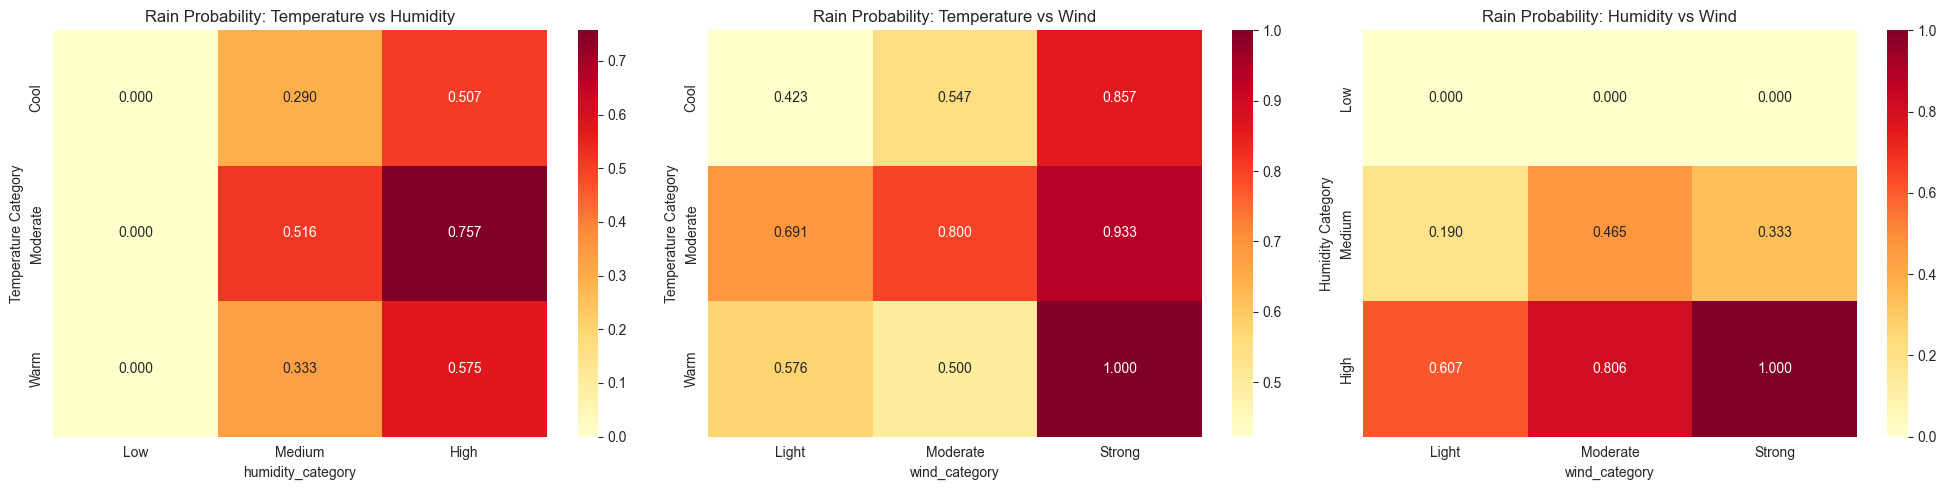

In [43]:
# Heatmap showing rain probability for different combinations
# Create pivot tables for different combinations

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Temperature vs Humidity (averaged over wind)
temp_hum_pivot = daily_df_sorted.groupby(['temp_category', 'humidity_category'])['rain_binary'].mean().unstack()
sns.heatmap(temp_hum_pivot, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[0])
axes[0].set_title('Rain Probability: Temperature vs Humidity')
axes[0].set_ylabel('Temperature Category')

# Temperature vs Wind (averaged over humidity)
temp_wind_pivot = daily_df_sorted.groupby(['temp_category', 'wind_category'])['rain_binary'].mean().unstack()
sns.heatmap(temp_wind_pivot, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Rain Probability: Temperature vs Wind')
axes[1].set_ylabel('Temperature Category')

# Humidity vs Wind (averaged over temperature)
hum_wind_pivot = daily_df_sorted.groupby(['humidity_category', 'wind_category'])['rain_binary'].mean().unstack()
sns.heatmap(hum_wind_pivot, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[2])
axes[2].set_title('Rain Probability: Humidity vs Wind')
axes[2].set_ylabel('Humidity Category')

plt.tight_layout()
plt.show()

In [44]:
# Statistical interaction analysis
from scipy.stats import chi2_contingency, pearsonr

print("Pairwise Correlations:")
print(f"Temperature - Humidity: {pearsonr(daily_df_sorted[temp_col], daily_df_sorted[humidity_col])[0]:.3f}")
print(f"Temperature - Wind: {pearsonr(daily_df_sorted[temp_col], daily_df_sorted[wind_col])[0]:.3f}")
print(f"Humidity - Wind: {pearsonr(daily_df_sorted[humidity_col], daily_df_sorted[wind_col])[0]:.3f}")

# Chi-square test for categorical variables
contingency_temp_rain = pd.crosstab(daily_df_sorted['temp_category'], daily_df_sorted['rain_binary'])
chi2_temp, p_temp = chi2_contingency(contingency_temp_rain)[:2]

contingency_hum_rain = pd.crosstab(daily_df_sorted['humidity_category'], daily_df_sorted['rain_binary'])
chi2_hum, p_hum = chi2_contingency(contingency_hum_rain)[:2]

contingency_wind_rain = pd.crosstab(daily_df_sorted['wind_category'], daily_df_sorted['rain_binary'])
chi2_wind, p_wind = chi2_contingency(contingency_wind_rain)[:2]

print("\nChi-square tests for association with rain:")
print(f"Temperature categories: Chi2={chi2_temp:.3f}, p-value={p_temp:.6f}")
print(f"Humidity categories: Chi2={chi2_hum:.3f}, p-value={p_hum:.6f}")
print(f"Wind categories: Chi2={chi2_wind:.3f}, p-value={p_wind:.6f}")

Pairwise Correlations:
Temperature - Humidity: 0.170
Temperature - Wind: 0.017
Humidity - Wind: -0.500

Chi-square tests for association with rain:
Temperature categories: Chi2=125.732, p-value=0.000000
Humidity categories: Chi2=94.683, p-value=0.000000
Wind categories: Chi2=28.857, p-value=0.000001


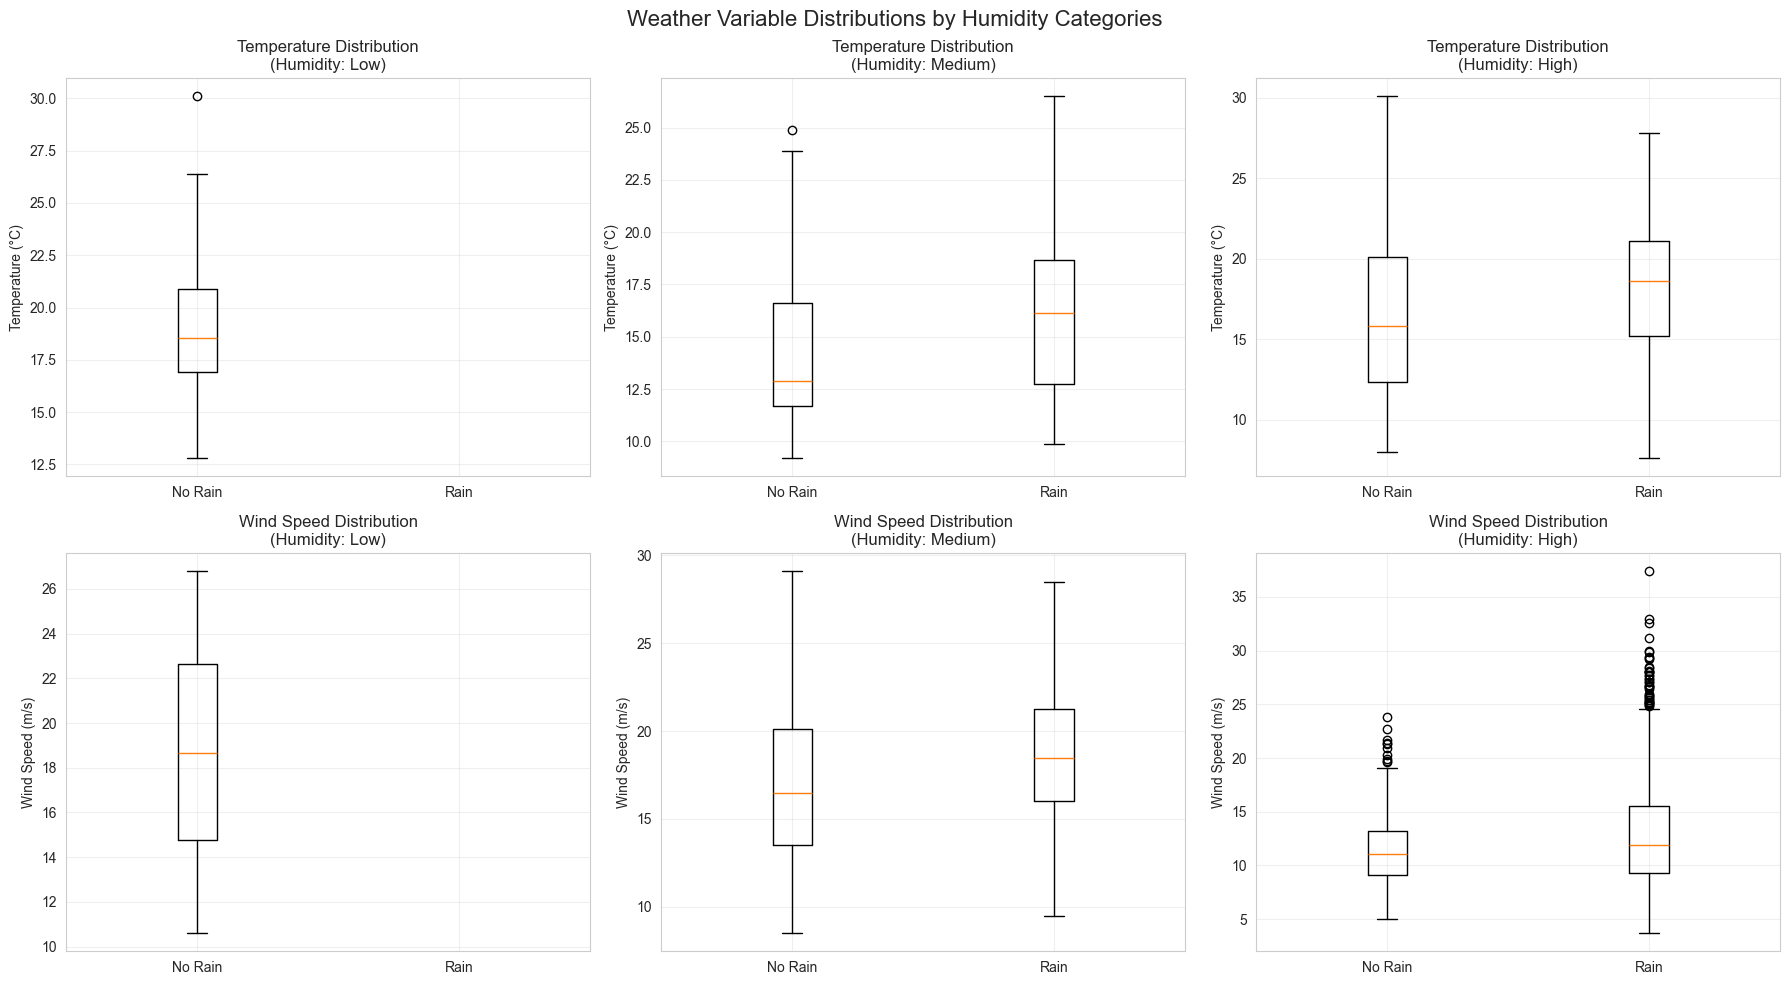

In [45]:
# Multi-variable box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Temperature by humidity categories and rain
for i, hum_cat in enumerate(['Low', 'Medium', 'High']):
    subset = daily_df_sorted[daily_df_sorted['humidity_category'] == hum_cat]
    no_rain = subset[subset['rain_binary'] == 0][temp_col]
    rain = subset[subset['rain_binary'] == 1][temp_col]
    
    axes[0, i].boxplot([no_rain, rain], labels=['No Rain', 'Rain'])
    axes[0, i].set_title(f'Temperature Distribution\n(Humidity: {hum_cat})')
    axes[0, i].set_ylabel('Temperature (°C)')
    axes[0, i].grid(True, alpha=0.3)

# Wind speed by humidity categories and rain
for i, hum_cat in enumerate(['Low', 'Medium', 'High']):
    subset = daily_df_sorted[daily_df_sorted['humidity_category'] == hum_cat]
    no_rain = subset[subset['rain_binary'] == 0][wind_col]
    rain = subset[subset['rain_binary'] == 1][wind_col]
    
    axes[1, i].boxplot([no_rain, rain], labels=['No Rain', 'Rain'])
    axes[1, i].set_title(f'Wind Speed Distribution\n(Humidity: {hum_cat})')
    axes[1, i].set_ylabel('Wind Speed (m/s)')
    axes[1, i].grid(True, alpha=0.3)

plt.suptitle('Weather Variable Distributions by Humidity Categories', fontsize=16)
plt.tight_layout()
plt.show()

Composite Weather Indices:
Comfort Index correlation with rain: 0.160
Weather Intensity correlation with rain: 0.314


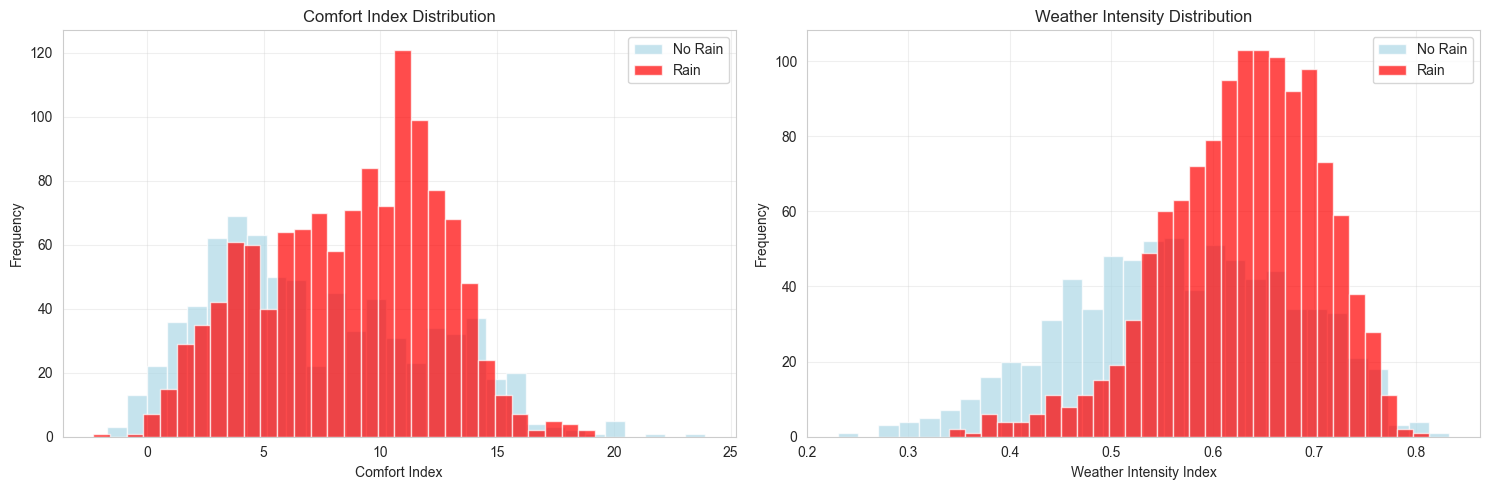

In [ ]:
daily_df_sorted['comfort_index'] = daily_df_sorted[temp_col] - (daily_df_sorted[humidity_col] / 10)


temp_norm = (daily_df_sorted[temp_col] - daily_df_sorted[temp_col].min()) / (daily_df_sorted[temp_col].max() - daily_df_sorted[temp_col].min())
hum_norm = (daily_df_sorted[humidity_col] - daily_df_sorted[humidity_col].min()) / (daily_df_sorted[humidity_col].max() - daily_df_sorted[humidity_col].min())
wind_norm = (daily_df_sorted[wind_col] - daily_df_sorted[wind_col].min()) / (daily_df_sorted[wind_col].max() - daily_df_sorted[wind_col].min())

daily_df_sorted['weather_intensity'] = (temp_norm * 0.3) + (hum_norm * 0.5) + (wind_norm * 0.2)

# Analyze these composite indices
composite_corr = daily_df_sorted[['comfort_index', 'weather_intensity', 'rain_binary']].corr()

print("Composite Weather Indices:")
print(f"Comfort Index correlation with rain: {composite_corr.loc['comfort_index', 'rain_binary']:.3f}")
print(f"Weather Intensity correlation with rain: {composite_corr.loc['weather_intensity', 'rain_binary']:.3f}")

# Visualize composite indices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Comfort index vs rain
axes[0].hist(daily_df_sorted[daily_df_sorted['rain_binary'] == 0]['comfort_index'], 
            alpha=0.7, label='No Rain', bins=30, color='lightblue')
axes[0].hist(daily_df_sorted[daily_df_sorted['rain_binary'] == 1]['comfort_index'], 
            alpha=0.7, label='Rain', bins=30, color='red')
axes[0].set_xlabel('Comfort Index')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Comfort Index Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Weather intensity vs rain
axes[1].hist(daily_df_sorted[daily_df_sorted['rain_binary'] == 0]['weather_intensity'], 
            alpha=0.7, label='No Rain', bins=30, color='lightblue')
axes[1].hist(daily_df_sorted[daily_df_sorted['rain_binary'] == 1]['weather_intensity'], 
            alpha=0.7, label='Rain', bins=30, color='red')
axes[1].set_xlabel('Weather Intensity Index')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Weather Intensity Distribution')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [47]:
# Seasonal combinational analysis
daily_df_sorted['season'] = daily_df_sorted['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

seasonal_analysis = daily_df_sorted.groupby(['season', 'temp_category', 'humidity_category']).agg({
    'rain_binary': ['count', 'mean'],
    temp_col: 'mean',
    humidity_col: 'mean',
    wind_col: 'mean'
}).round(3)

seasonal_analysis.columns = ['total_days', 'rain_prob', 'avg_temp', 'avg_hum', 'avg_wind']
seasonal_analysis = seasonal_analysis[seasonal_analysis['total_days'] >= 5]  # Filter for meaningful sample sizes

print("Seasonal Weather Combination Analysis:")
print(seasonal_analysis.sort_values('rain_prob', ascending=False).head(15))

Seasonal Weather Combination Analysis:
                                        total_days  rain_prob  avg_temp  \
season temp_category humidity_category                                    
Winter Moderate      High                      326      0.825    20.690   
Autumn Cool          Medium                     15      0.800    13.620   
Winter Moderate      Medium                     20      0.800    19.275   
Spring Moderate      High                      362      0.762    18.734   
Autumn Moderate      High                      292      0.682    18.008   
Summer Moderate      High                       23      0.652    16.300   
Winter Warm          High                      162      0.617    24.135   
Autumn Cool          High                       88      0.557    13.768   
Summer Cool          High                      366      0.511    11.899   
       Moderate      Medium                     12      0.500    16.558   
Spring Cool          High                      108      0.454

In [49]:
# Summary insights
print("=" * 50)
print("COMBINATIONAL ANALYSIS SUMMARY")
print("=" * 50)

# Find best and worst combinations for rain prediction
best_rain_combo = combination_analysis.iloc[0]
worst_rain_combo = combination_analysis.iloc[-1]

print(f"\nHIGHEST RAIN PROBABILITY COMBINATION:")
print(f"Categories: {best_rain_combo.name}")
print(f"Rain Probability: {best_rain_combo['rain_probability']:.3f}")
print(f"Average Conditions: {best_rain_combo['avg_temp']:.1f}°C, {best_rain_combo['avg_humidity']:.1f}% humidity, {best_rain_combo['avg_wind']:.1f} m/s wind")

print(f"\nLOWEST RAIN PROBABILITY COMBINATION:")
print(f"Categories: {worst_rain_combo.name}")
print(f"Rain Probability: {worst_rain_combo['rain_probability']:.3f}")
print(f"Average Conditions: {worst_rain_combo['avg_temp']:.1f}°C, {worst_rain_combo['avg_humidity']:.1f}% humidity, {worst_rain_combo['avg_wind']:.1f} m/s wind")

# Key correlations
temp_rain_corr = daily_df_sorted[temp_col].corr(daily_df_sorted['rain_binary'])
hum_rain_corr = daily_df_sorted[humidity_col].corr(daily_df_sorted['rain_binary'])
wind_rain_corr = daily_df_sorted[wind_col].corr(daily_df_sorted['rain_binary'])

print(f"\nINDIVIDUAL VARIABLE CORRELATIONS WITH RAIN:")
print(f"Temperature: {temp_rain_corr:.3f}")
print(f"Humidity: {hum_rain_corr:.3f}")
print(f"Wind Speed: {wind_rain_corr:.3f}")

print(f"\nMOST PREDICTIVE SINGLE VARIABLE: {['Temperature', 'Humidity', 'Wind Speed'][np.argmax([abs(temp_rain_corr), abs(hum_rain_corr), abs(wind_rain_corr)])]}")

COMBINATIONAL ANALYSIS SUMMARY

HIGHEST RAIN PROBABILITY COMBINATION:
Categories: ('Warm', 'High', 'Strong')
Rain Probability: 1.000
Average Conditions: 23.5°C, 91.0% humidity, 27.1 m/s wind

LOWEST RAIN PROBABILITY COMBINATION:
Categories: ('Warm', 'Medium', 'Strong')
Rain Probability: nan
Average Conditions: nan°C, nan% humidity, nan m/s wind

INDIVIDUAL VARIABLE CORRELATIONS WITH RAIN:
Temperature: 0.201
Humidity: 0.214
Wind Speed: 0.084

MOST PREDICTIVE SINGLE VARIABLE: Humidity
